# Служба системных разработок для госорганов (СКИФ)
## ТЗ на разработку дашбоардов 

Набор данных, участвующий в разработке: *Источники финансирования.rpt*

## Импортирование библиотек и подготовка к подключению датасетов

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Загрузка набора данных может осуществляться через Google Drive, поскольку объём файлов очень большой, а подгрузка через облако позволяет сэкономить время на этом процессе. Прописываем путь к папке с файлами, с которыми мы будем взаимодействовать.

**ВЫБОР СРЕДЫ ЗАПУСКА** (выбор параметра Environment):

- *Google* для Colab
- *Anaconda* для Jupyter Notebook (Anaconda)



In [ ]:
Environment = 'Google' 
#Environment = "Anaconda"

In [ ]:
if Environment == 'Google':
  from google.colab import drive
  drive.mount('/content/drive')
  path = "/content/drive/My Drive/Практика/"
else:
  path = "downloads/"

Mounted at /content/drive


![Рис. 1 Этапы процесса KDD](https://sun9-83.userapi.com/s/v1/if2/iQbEMi_IYdz6zskJ4F4nOJ9RXXcBhSBaCcs1PueK9bbNygyhjpp73hte2enPXKlhmnwW312G9Lq0lZdOY2z0R3Qt.jpg?size=875x584&quality=96&type=album)

## Подготовка к подключению данных; Проверка на поля и их ожидаемый порядок

* Файлы с расширением .rpt используются программами для экспортированных файлов отчета. Это, как правило, текстовые отчеты, фиксирующие подробную информацию о данных, собранных или сопоставленных программой.

* Данные находятся в формате «с фиксированной длиной полей». Кодировка данных: UTF-8 со спецификацией.

* Файл «Источники финансирования.rpt» открывался в программе "Блокнот". Были установлены имена полей, которые содержат как латинские, так и русские буквы.	Англоязычные названия полей нельзя назвать служебными/лишними.

* Поле ID - совершенно непригодные к процессу анализа данные. Столбец с ними решено не считывать.

Названия полей:

In [ ]:
cols_3= ['Period_Name','Source_Catalog_Code','Source_Code','Source_Name','ВБ','Адм','ИФ','ИФ Name','Утвержденные бюджетные назначения','Исполнено','Неисполненные назначения','ID']

Чтение названий полей из файла загрузки, далее конвертирование списка названий в строку, удаление пробелов, повторение тех же операций на заранее заданный список названий, затем стравнение двух строк.

In [ ]:
df_if = pd.read_fwf(os.path.join(path,"Источники финансирования.rpt"), nrows = 1)
str4 = ''.join(str(e) for e in cols_3).replace(' ', '')
str5 = ''.join(str(e) for e in df_if.columns).replace(' ', '')
if str4 == str5:
  print('Порядок верный')
else:
  print('Порядок НЕВЕРНЫЙ. Отредактируйте данные')

Порядок верный


Функция pd.read_fwf используется для чтения таблицы форматированных строк с фиксированной шириной в DataFrame. При просмотре файла было выявлено, что первая строка не несет в себе информации, поэтому она пропускается. Заголовки указываются вручную по названиям полей, так как в прочих случаях таблица считывалась неверно. Также для некоторых полей вручную задаются типы, так как данные поля содержат некоторые коды, которые могут начинаться с нуля, тогда при прочтении важно не упустить этот момент и не принимать такие поля за целочисленные. В дальнейшем, даже несмотря на конкретное указание типа, этим полям будет присвоен тип object из-за особенностей библиотеки pandas.

Считываем набор данных без столбца "ID":

In [ ]:
df_f = pd.read_fwf(os.path.join(path,"Источники финансирования.rpt"),skiprows = 1, header = 0, names = cols_3[:-1] , usecols = cols_3[:-1], dtype = {'ИФ Name': str})

In [ ]:
df_f.head()

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
0,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000710,"Бюджетные кредиты, полученные от других бюджет...",14907900.0,13500000.0,1407900.0
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5800000.0,-5800000.0,0.0
2,2007 год,Гос,000,Российская Федерация,0.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,7.0,109998.0,-109991.0
3,2007 год,Гос,000,Российская Федерация,3.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,6.0,18.0,-12.0
4,2007 год,Гос,000,Российская Федерация,2.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,2.0,6.0,-4.0


## Тепловая карта

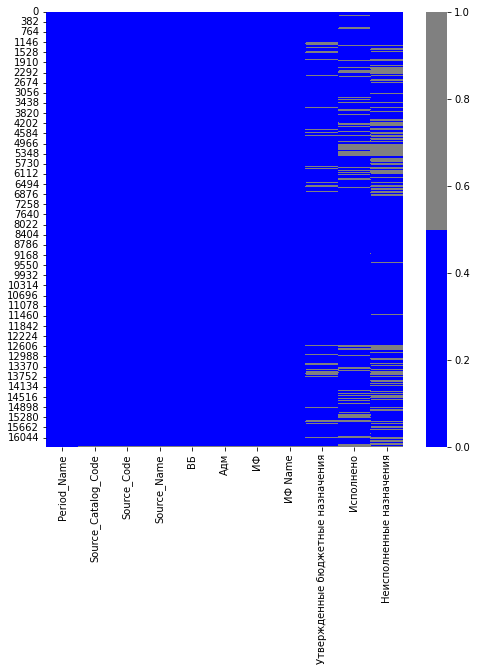

In [ ]:
plt.rcParams['figure.figsize']=8,8 
cols_3 = df_f.columns

# определяем цвета 
colours = ["Blue", "Grey"]
sns.heatmap(df_f[cols_3].isnull(), cmap=sns.color_palette(colours))

* Серые участки - пустые (NaN) значения, синие - заполненные. В процессе работы над очисткой\заменой пропущенных значений количество белых участков будет сведено к минимуму.

* Чем больше на диаграмме данных, тем проще не заметить какие-то единичные\маленькие очереди из пропущенных данных – наслоение слишком большое, их можно не увидеть. Для этого существует альтернатива в виде функции WhoIsNull().

* Видим, что количество пропущенных значений минимально и распределено лишь между последними тремя атрибутами "Утверждённые бюджетные значения", "Исполнено" и "Неисполненные значения". 

## Описательная статистика и анализ пропущенных значений

Цели:
* устранение шумов,
* обработка недостающих данных и выбросов

Качество входных данных априори неизвестно. А потому этап его оценки необходим. 
На дашборде будет отображена информация о качестве данных после очистки. 
Место отображения – кнопка с гиперссылкой на основном листе с дашбордом.


**Были реализованы следующие инструменты анализа:**
- функция удаления колонок с определенным количеством пропущенных
- функция удаления колонок с не уникальными значениями
- функция удаления категориальных колонок, где содержится значение «не вычислено»

Параметры для удаления от заказчика:

In [ ]:
REMOVE_RARE_INDICATOR = True
PERCENT_REMOVE_RARE_INDICATOR = 99.5

REMOVE_NOT_UNIQUE = True
CORRELATION_MATRIX_CUT_INDICATOR = 0.8
REMOVE_CORRELATION = True
CHECK_CODES = True

In [ ]:
def write_to_file(filename,array):
  """ Файл будет сохранен в формате .txt
  """

  f = open(filename, 'w')
  array = map(lambda x: x+'\n', array)
  f.writelines(array)
  f.close()
  return "Файл успешно записан"

Методы решения проблемы отсутствующих данных:
* **Замена отсутствующих данных**.

  Отсутствующие данные объектов можно заменить на конкретные числовые значения, для этого можно использовать метод fillna(). Этот метод не изменяет текущую структуру, он возвращает структуру DataFrame, созданную на базе существующей, с заменой NaN-значений на те, что переданы в метод в качестве аргумента. Данные можно заполнить средним значением по столбцу.
В зависимости от задачи используется тот или иной метод заполнения отсутствующих элементов, это может быть нулевое значение, математическое ожидание, медиана и т.п. Для замены NaN-элементов на конкретные значения, можно использовать интерполяцию, которая реализована в методе interpolate(), алгоритм интерполяции задается через аргументы метода. 


* **Удаление объектов/столбцов с отсутствующими данными.**

  Довольно часто используемый подход при работе с отсутствующими данными – это удаление записей (строк) или полей (столбцов), в которых встречаются пропуски. Для того, чтобы удалить все объекты, которые содержат значения NaN существует метод dropna() без аргументов. Вместо записей, можно удалить поля, для этого нужно вызвать метод dropna с аргументом axis=1. Pandas позволяет задать порог на количество не-NaN элементов. 

В зависимости от специфики каждого конкретного атрибута будет выбираться оптимальный из этих двух способов.



In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Period_Name                        16383 non-null  object 
 1   Source_Catalog_Code                16382 non-null  object 
 2   Source_Code                        16382 non-null  object 
 3   Source_Name                        16382 non-null  object 
 4   ВБ                                 16382 non-null  float64
 5   Адм                                16382 non-null  object 
 6   ИФ                                 16382 non-null  object 
 7   ИФ Name                            16382 non-null  object 
 8   Утвержденные бюджетные назначения  14967 non-null  float64
 9   Исполнено                          13628 non-null  float64
 10  Неисполненные назначения           11817 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


Можно сделать вывод, что типы данных считались верно. Также видно, что во всех столбцах есть отсутствующие значения. Посмотрим теперь на количество пропусков в столбцах:

In [ ]:
def get_missing_information(df,sorted=False):
  missing_values = df_f.isnull().sum()
  missing_percent_values = df_f.isnull().sum()/df_f.shape[0] * 100
  missing = pd.DataFrame({'Пропущено значений': missing_values, 'Пропущено в %': missing_percent_values}).round(2)
  if sorted:
    missing = missing.sort_values(by="Пропущено значений")
  return missing

In [ ]:
missing = get_missing_information(df_f)
missing

,Пропущено значений,Пропущено в %
Period_Name,0,0.00
Source_Catalog_Code,1,0.01
Source_Code,1,0.01
Source_Name,1,0.01
ВБ,1,0.01
Адм,1,0.01
ИФ,1,0.01
ИФ Name,1,0.01
Утвержденные бюджетные назначения,1416,8.64
Исполнено,2755,16.82


Анализ пропущенных значений выявил довольно приличные результаты в сравнении с показателями наборов данных по доходам\расходам. Самый высокий процент пропусков наблюдается в столбце "Неисполненные значения" и составляет около 28 пунктов.


Тем не менее, атрибуты с процентом пропуска, первышающим установленный заказчиком ранее, могут быть удалены. Для автоматизации этого процесса создана функция del_rare_columns:

In [ ]:
def del_rare_columns(df, REMOVE_RARE_INDICATOR, PERCENT_REMOVE_RARE_INDICATOR):
  df_1 = df.copy()
  if REMOVE_RARE_INDICATOR == True:
    ll = [df_1.columns[i] for i in range(len(df_1.columns)) if get_missing_information(df_1)['Пропущено в %'].iloc[i]>PERCENT_REMOVE_RARE_INDICATOR]
    print(ll)
    for t in ll:
      del df_1[t]
  return df_1

In [ ]:
df_f = del_rare_columns(df_f,REMOVE_RARE_INDICATOR, PERCENT_REMOVE_RARE_INDICATOR)

[]


На выводе получен пустой список, поскольку атрибутов с процентом пропущенных значений равным или превышающим установленное ранее заказчиком значение, не обнаружилось.

## Уникальные значения

Рассмотрим следующие поля: 'Period_Name', 'Source_Catalog_Code', 'Source_Code','Source_Name', 'ВБ', 'Адм', 'ИФ', 'ИФ Name'.

In [ ]:
df_f['ВБ'].unique()

array([10.,  5.,  0.,  3.,  2.,  4.,  9., 13., 11., 12.,  7.,  6., nan])

In [ ]:
df_f['Адм'].unique()

array(['000', '021', '052', '053', '050', '100', '020', '370', '022',
       '304', 'И70', '171', '071', '305', 'И80', '056', '417', '165',
       '077', '157', '096', '392', '048', '049', '004', '051', '395',
       '055', '007', '086', '023', '806', '188', '060', '172', '318',
       '721', '054', '350', '161', '182', '498', '081', '177', '074',
       '073', '186', '168', nan], dtype=object)

Видно, что в них всего совсем немного уникальных значений в рамках обширного набора данных. Можно рассмотреть вопрос их удаления.

In [ ]:
df_f['Source_Catalog_Code'].unique()

array(['Гос', 'МНЦП', 'Рег', 'СБС', 'ТГВФ', 'ЗАТО', 'НЕ ВЫЧИСЛЕН',
       'ПосОБР', nan], dtype=object)

In [ ]:
df_f['Source_Code'].unique()

array(['000', '01001', '10007', '14008', '28009', '35012', '52001',
       '70088', '01', '14900', '69008', '70090', '02', '04', '07', '0909',
       '19', '56040', '87015', '00', '59', '14', '58900', '05', '44',
       '69900', 'НЕ ВЫЧИСЛЕН', '18', '56', '56005', '56006', '56009',
       '56010', '56011', '11', '12', '56900', '35', '66900', '33', '21',
       '03', '16', '60', '56003', '87', '09000', '09', '21034', '52',
       '84900', '87007', '45', '45900', '49', '63001', '29900', '06',
       '02011', '59023', '59025', '5604016', '5603218', '32051',
       '5604306', '41013', '90005', '68900', '90010', '90900', '29', '30',
       '87900', '01000', '56048', '87010', '19031', '19036', '42010',
       '60038', '52033', '42002', '49900', '17071', '59001', '01024',
       '01025', '32000', '32', '56002', '56013', '94', '02001', '56001',
       '80', '88', '52900', '07019', '90009', '9000', '25', '60001',
       '69010', '10', '67900', '94900', '94000', '08', '22', nan],
      dtype=obj

В составе некоторых атрибутов находим значения "НЕ ВЫЧИСЛЕН". Строки с такими показателями будем удалять, так как они не несут смысла в рамках анализа.

In [ ]:
from collections import Counter

In [ ]:
Counter(df_f['Source_Code']).most_common(20)

[('01', 5900),
 ('000', 4210),
 ('02', 1169),
 ('07', 587),
 ('00', 582),
 ('44', 484),
 ('04', 260),
 ('03', 173),
 ('87', 138),
 ('05', 133),
 ('НЕ ВЫЧИСЛЕН', 112),
 ('52001', 101),
 ('87900', 100),
 ('11', 96),
 ('56900', 94),
 ('59', 92),
 ('29900', 85),
 ('56', 75),
 ('12', 72),
 ('01001', 71)]

Такие сведения об уникальных значениях полей могут пригодиться в процессе анализа выбросов, который будет реализован позже.

In [ ]:
def plot_un_bar(df, b):
  plt.rcParams['figure.figsize']=8,8 
  s = sns.countplot(x = b, data = df)
  for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
  plt.show()

Построим диаграмму с целью проанализировать распределение данных по региональному признаку.

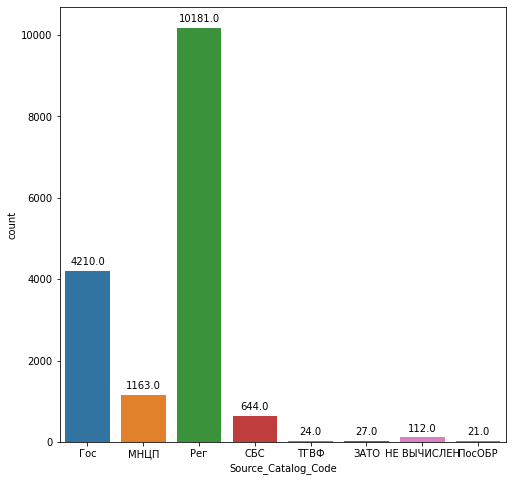

In [ ]:
plot_un_bar(df_f, 'Source_Catalog_Code')

* В результате построения диаграммы было выяснено, что основной акцент в датасете делается на региональный сектор - здесь наблюдается доминирующее количество информации - свыше 10 тысяч записей, что в сумме превышает данные по всем остальным показателям.

* На втором месте по количеству данных находится государственный (федеральный) сектор.

Посмотрим, какие образования относятся к тем или иным группам:

In [ ]:
Counter(df_f[df_f['Source_Catalog_Code'] == 'Гос'].Source_Name)

Counter({'Российская Федерация': 4210})

In [ ]:
Counter(df_f[df_f['Source_Catalog_Code'] == 'СБС'].Source_Name).most_common(10)

[('Бюджет субъекта - Ханты-Мансийский автономный округ - Югра', 100),
 ('Бюджет субъекта - Пермский край', 94),
 ('Бюджет субъекта - Волгоградская область', 85),
 ('Бюджет субъекта - Ростовская область', 69),
 ('Бюджет субъекта - Республика Ингушетия', 63),
 ('Бюджет субъекта - Ямало-Ненецкий автономный округ', 46),
 ('Бюджет субъекта - Ленинградская область', 41),
 ('Бюджет субъекта - Челябинская область', 37),
 ('Бюджет субъекта - Омская область', 31),
 ('Бюджет субъекта - Ненецкий автономный округ', 25)]

In [ ]:
Counter(df_f[df_f['Source_Catalog_Code'] == 'МНЦП'].Source_Name).most_common(10)

[('Азовский райфинотдел', 101),
 ('Абзелиловское РАЙФУ', 71),
 ('Чернушинский', 54),
 ('Чучковский', 51),
 ('г.Губаха', 50),
 ('г.Когалым', 41),
 ('г.Кунгур', 36),
 ('Козульский', 36),
 ('г. Нижний Новгород', 33),
 ('г.Новый Уренгой', 32)]

In [ ]:
Counter(df_f[df_f['Source_Catalog_Code'] == 'Рег'].Source_Name).most_common(10)

[('Республика Башкортостан', 5900),
 ('Республика Бурятия', 1169),
 ('Республика Коми', 582),
 ('Субъекты РФ', 582),
 ('Курская область', 484),
 ('Кабардино-Балкарская Республика', 260),
 ('Республика Дагестан', 173),
 ('Республика Калмыкия', 133),
 ('Ханты-Мансийский автономный округ - Югра', 116),
 ('Республика Татарстан', 96)]

In [ ]:
Counter(df_f[df_f['Source_Catalog_Code'] == 'ТГВФ'].Source_Name)

Counter({'ТГВФ - Ямало-Ненецкий автономный округ': 14,
         'ФОМС - Республика Мордовия': 10})

## Визуализация

Для более наглядной работы с данными напишем несколько функций для визуализации информации, с которой мы работаем. Это поможет сделать некоторые выводы и правильно расставить акценты в последующем анализе.

In [ ]:
def plot_un_bar_top(df, b,n):
  plt.rcParams['figure.figsize']=8,8 
  s = sns.countplot(x = b, data = df,order = df_f.value_counts(df[b]).iloc[:n].index, palette=sns.color_palette("GnBu_d", n_colors=17))
  for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
  plt.xticks( rotation='vertical')
  plt.show()

In [ ]:
def plot_un_bar_bot(df, b,n):
  plt.rcParams['figure.figsize']=8,8 
  s = sns.countplot(x = b, data = df,order = df_f.value_counts(df[b]).iloc[-15:].index, palette=sns.color_palette("GnBu_d", n_colors=17))
  for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
  plt.xticks(rotation='vertical')
  plt.show()

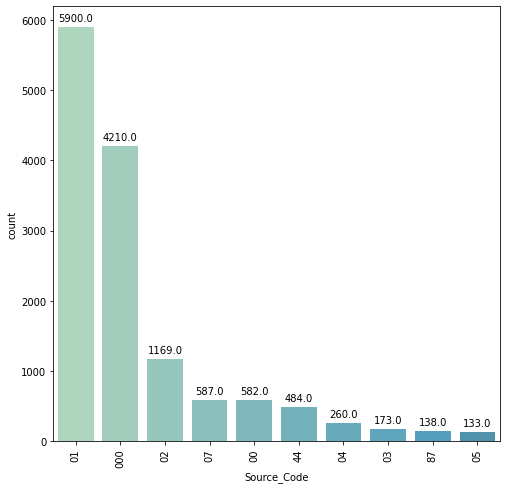

In [ ]:
plot_un_bar_top(df_f, 'Source_Code', 10)

Наблюдаем доминирующее количество значений "01" и "000"

In [ ]:
df_f['Source_Name'].unique()

array(['Российская Федерация', 'Абзелиловское РАЙФУ', 'Моздокский район',
       'г. Малгобек', 'г.Суздаль', 'Гурьевск', 'Азовский райфинотдел',
       'район Забайкальский', 'Республика Башкортостан',
       'Бюджет субъекта - Республика Ингушетия', 'Миасский ГО',
       'район Калганский', 'Республика Бурятия',
       'Кабардино-Балкарская Республика', 'Республика Коми',
       'ФОМС - Республика Мордовия', 'ЗАТО Звездный', 'Чернушинский',
       'р.Кондинский', 'Субъекты РФ', 'Рязанская область',
       'Республика Ингушетия', 'Бюджет субъекта - Ростовская область',
       'Республика Калмыкия', 'Курская область',
       'Бюджет субъекта - Челябинская область', 'НЕ ВЫЧИСЛЕНО',
       'Краснодарский край', 'Пермский край', 'г.Губаха', 'г.Добрянка',
       'г.Кунгур', 'г.Лысьва', 'г.Соликамск', 'Республика Татарстан',
       'Республика Тыва', 'Бюджет субъекта - Пермский край',
       'Калининградская область', 'Бюджет субъекта - Тульская область',
       'Ивановская область', 'Красно

Топ 10 субъектов по количеству записей

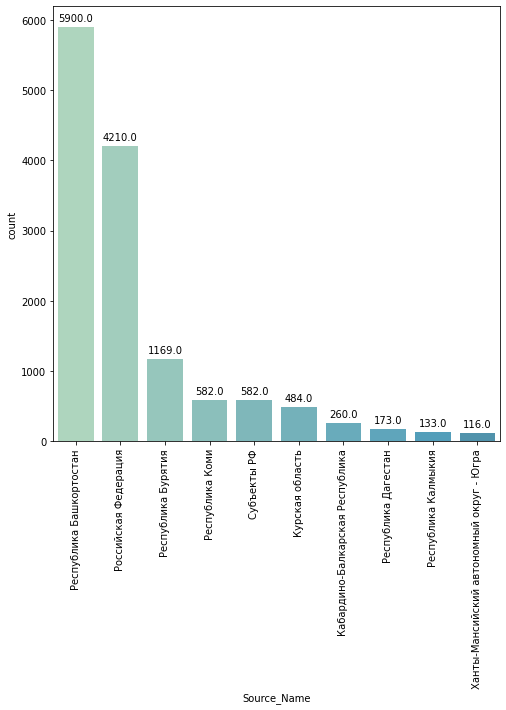

In [ ]:
plot_un_bar_top(df_f, 'Source_Name', 10)

Больше всего данных обнаружено по республике Башкортостан, на втором по значимости месте Российская Федерация. Это довольно странная динамика, которая нуждается в проверке.

Наименьшее количество записей в следующих субъектах:

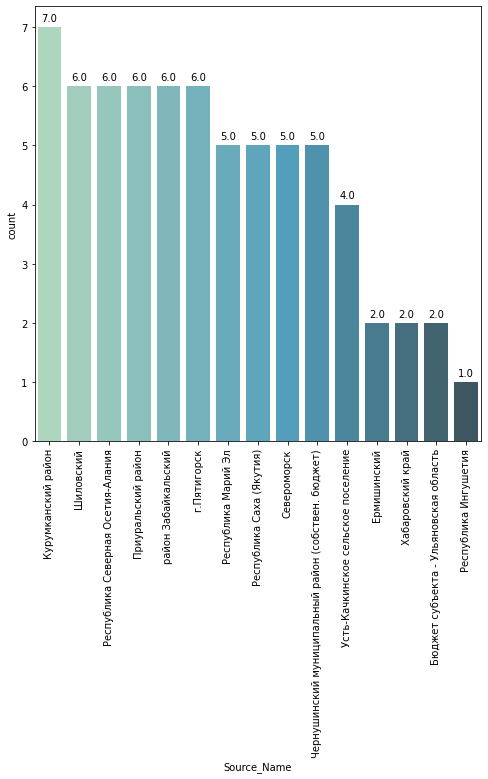

In [ ]:
plot_un_bar_bot(df_f, 'Source_Name', 10)

В некоторых областях страны количество данных настолько незначительно, что исчисляется 1-7 строками.

## Матрица корреляции

In [ ]:
corr_matrix = df_f.corr().abs()
painted_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color : red' if x>CORRELATION_MATRIX_CUT_INDICATOR else '')
painted_corr_matrix

,ВБ,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
ВБ,1.000000,0.000159,0.003952,0.014114
Утвержденные бюджетные назначения,0.000159,1.000000,0.131929,0.041604
Исполнено,0.003952,0.131929,1.000000,0.737361
Неисполненные назначения,0.014114,0.041604,0.737361,1.000000


In [ ]:
def corrX_orig(df, delete=REMOVE_CORRELATION,cut = CORRELATION_MATRIX_CUT_INDICATOR) :
  if delete:
    str_cols = np.array(df.dtypes[df.dtypes=="object"].index)
    df_nums = df.drop(columns=str_cols)
    corr_mtx = df_nums.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    drop = list()

    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    dropcols_names = list(df_nums.columns[[item for item in drop_set]])
    
    return(dropcols_names)
  else:
    print("Удаление не требуется, вызов функции пропускается.")

In [ ]:
cols_to_drop = corrX_orig(df_f)

In [ ]:
new_df_3 = df_f.drop(columns=cols_to_drop)

In [ ]:
corr_matrix = new_df_3.corr().abs()
painted_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color : red' if x>CORRELATION_MATRIX_CUT_INDICATOR else '')
painted_corr_matrix

,ВБ,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
ВБ,1.000000,0.000159,0.003952,0.014114
Утвержденные бюджетные назначения,0.000159,1.000000,0.131929,0.041604
Исполнено,0.003952,0.131929,1.000000,0.737361
Неисполненные назначения,0.014114,0.041604,0.737361,1.000000


In [ ]:
new_df_3.head()

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
0,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000710,"Бюджетные кредиты, полученные от других бюджет...",14907900.0,13500000.0,1407900.0
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5800000.0,-5800000.0,0.0
2,2007 год,Гос,000,Российская Федерация,0.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,7.0,109998.0,-109991.0
3,2007 год,Гос,000,Российская Федерация,3.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,6.0,18.0,-12.0
4,2007 год,Гос,000,Российская Федерация,2.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,2.0,6.0,-4.0


Ни один атрибут не был удалён, поскольку коэффициенты корреляции между столбцами не превышали заданного заказчиком.

In [ ]:
new_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Period_Name                        16383 non-null  object 
 1   Source_Catalog_Code                16382 non-null  object 
 2   Source_Code                        16382 non-null  object 
 3   Source_Name                        16382 non-null  object 
 4   ВБ                                 16382 non-null  float64
 5   Адм                                16382 non-null  object 
 6   ИФ                                 16382 non-null  object 
 7   ИФ Name                            16382 non-null  object 
 8   Утвержденные бюджетные назначения  14967 non-null  float64
 9   Исполнено                          13628 non-null  float64
 10  Неисполненные назначения           11817 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


## Анализ выбросов

Общие алгоритмы обнаружения выбросов включают методы на основе статистики, методы на основе кластеризации и некоторые другие специальные методы.

1. Простая статистика

  При использовании pandas, Мы можем напрямую восопльзоваться функцией describe(), чтобы соблюдать статистическое описание данных (просто грубое наблюдение некоторой статистики), а именно: df_ir.describe(). Также можно просто построить диаграмму рассеяния, чтобы четко наблюдать наличие выбросов.

2. Блок-схема

  Этот метод использует межквартильный размах (IQR) ящичной диаграммы для обнаружения выбросов, также называемый тестом Тьюки. Межквартильный размах (IQR) - это разница между верхним квартилем и нижним квартилем. И мы используем 1,5-кратный IQR в качестве стандарта и оговариваем, что точки, которые превышают верхний квартиль + 1,5-кратное расстояние IQR или нижний квартиль-1,5-кратное расстояние IQR, являются выбросами.



In [ ]:
df_f.describe()

,ВБ,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
count,16382.000000,1.496700e+04,1.362800e+04,1.181700e+04
mean,5.556586,2.222553e+08,3.107048e+09,-4.826376e+09
std,4.228350,4.636530e+10,5.930593e+11,3.213121e+11
min,0.000000,-1.111111e+12,-1.777556e+13,-1.540532e+13
25%,2.000000,3.000000e+00,5.000000e+00,0.000000e+00
50%,4.000000,3.494545e+05,6.004834e+05,9.000000e+02
75%,10.000000,6.632330e+06,6.340014e+06,5.293060e+06
max,13.000000,1.000000e+12,1.728285e+13,1.111111e+12


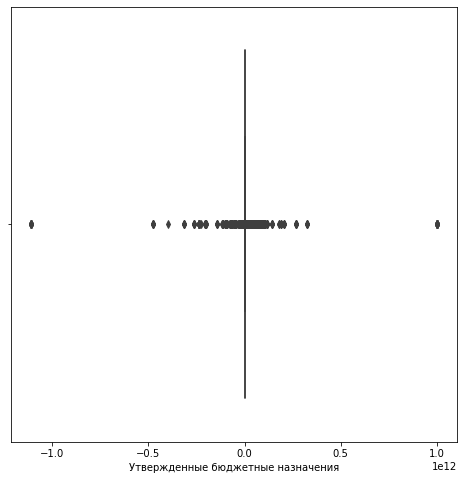

In [ ]:
 n = 'Утвержденные бюджетные назначения'
 ax = sns.boxplot(x=df_f[n])

In [ ]:
def kvart(name, df):
  mid_50 = list(df[name].quantile([.25, .75]))
  price_25, price_75 = mid_50[0], mid_50[1]

  iqr = price_75 - price_25
  low = price_25 - 1.5 * iqr
  high = price_75 + 1.5 * iqr
  return (iqr,low,high)

Посмотрим на отрицательные значения:

In [ ]:
df_f[df_f[n] < 0]

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5.800000e+06,-5.800000e+06,0.000000e+00
7,2007 год,Гос,000,Российская Федерация,5.0,000,02010200000000810,"Кредиты, полученные в валюте Российской Федера...",-5.800000e+06,-5.800000e+06,0.000000e+00
29,2007 год,Гос,000,Российская Федерация,5.0,000,02010100000000810,"Бюджетные кредиты, полученные от других бюджет...",-6.432000e+06,-1.059800e+06,-5.372200e+06
30,2007 год,Гос,000,Российская Федерация,10.0,000,02010100000000810,"Бюджетные кредиты, полученные от других бюджет...",-1.513450e+07,-3.500000e+06,-1.163450e+07
33,2007 год,Гос,000,Российская Федерация,10.0,000,08000000000000500,Увеличение остатков средств бюджетов,-1.977148e+08,-1.759232e+08,-2.179162e+07
...,...,...,...,...,...,...,...,...,...,...,...
16203,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060401000000000,Исполнение государственных и муниципальных гар...,-6.307757e+08,0.000000e+00,-6.307757e+08
16204,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01010000020000810,Погашение государственных ценных бумаг субъект...,-4.900000e+09,0.000000e+00,-4.900000e+09
16205,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060401000000800,Исполнение государственных и муниципальных гар...,-6.307757e+08,0.000000e+00,-6.307757e+08
16210,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01010000000000800,Погашение государственных (муниципальных)ценн...,-4.900000e+09,0.000000e+00,-4.900000e+09


Таких значений много - они будут вынесены в отдельный файл.

Посмотрим, сколько значений лежат в диапазоне первого квартиля - 1.5 интерквартильных размаха:

In [ ]:
df_f[df_f[n] < kvart(n, df_f)[1]]

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
30,2007 год,Гос,000,Российская Федерация,10.0,000,02010100000000810,"Бюджетные кредиты, полученные от других бюджет...",-1.513450e+07,-3.500000e+06,-1.163450e+07
33,2007 год,Гос,000,Российская Федерация,10.0,000,08000000000000500,Увеличение остатков средств бюджетов,-1.977148e+08,-1.759232e+08,-2.179162e+07
35,2007 год,Гос,000,Российская Федерация,5.0,000,08000000000000500,Увеличение остатков средств бюджетов,-3.087460e+08,-1.956196e+08,-1.131264e+08
53,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000810,"Бюджетные кредиты, полученные от других бюджет...",-1.513450e+07,-3.500000e+06,-1.163450e+07
54,2007 год,Гос,000,Российская Федерация,10.0,000,08020100100000510,Увеличение прочих остатков денежных средств бю...,-1.977148e+08,-1.759232e+08,-2.179162e+07
...,...,...,...,...,...,...,...,...,...,...,...
16203,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060401000000000,Исполнение государственных и муниципальных гар...,-6.307757e+08,0.000000e+00,-6.307757e+08
16204,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01010000020000810,Погашение государственных ценных бумаг субъект...,-4.900000e+09,0.000000e+00,-4.900000e+09
16205,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060401000000800,Исполнение государственных и муниципальных гар...,-6.307757e+08,0.000000e+00,-6.307757e+08
16210,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01010000000000800,Погашение государственных (муниципальных)ценн...,-4.900000e+09,0.000000e+00,-4.900000e+09


В данном диапазоне находится лишь некоторая минимальная часть отрицательных значений.

Посмотрим, сколько значений лежат в диапазонах третьего квартиля + 1.5 интерквартильных размаха:

In [ ]:
df_f[df_f[n] > kvart(n, df_f)[2]]

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
8,2007 год,Гос,000,Российская Федерация,5.0,000,08020100050000610,Уменьшение прочих остатков денежных средств бю...,3.113051e+08,1.852408e+08,1.260643e+08
11,2007 год,Гос,000,Российская Федерация,5.0,000,08000000000000600,Уменьшение остатков средств бюджета,3.113051e+08,1.852408e+08,1.260643e+08
12,2007 год,Гос,000,Российская Федерация,10.0,000,08000000000000600,Уменьшение остатков средств бюджета,2.013791e+08,1.617218e+08,3.965727e+07
23,2007 год,Гос,000,Российская Федерация,5.0,000,08020100000000610,Уменьшение прочих остатков денежных средств бю...,3.113051e+08,1.852408e+08,1.260643e+08
25,2007 год,Гос,000,Российская Федерация,10.0,000,08020100000000610,Уменьшение прочих остатков денежных средств бю...,2.013791e+08,1.617218e+08,3.965727e+07
...,...,...,...,...,...,...,...,...,...,...,...
16201,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060100000000630,Средства от продажи акций и иных форм участия ...,1.029630e+10,0.000000e+00,1.029630e+10
16202,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060000000000000,Иные источники внутреннего финансирования деф...,9.665524e+09,7.112727e+09,2.552797e+09
16207,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01030000000000000,Бюджетные кредиты из других бюджетов бюджетной...,6.751700e+08,0.000000e+00,6.751700e+08
16208,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01050201000000610,Уменьшение прочих остатков денежных средств б...,1.766518e+09,9.376099e+10,NaN


В этом диапазоне отрицательных значений уже не наблюдается.

Посмотрим на значения более 1 000 000 000, теоретически, они по праву могут находиться в наших данных.


In [ ]:
df_f[df_f[n] > 1000000000]

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
165,2007 год,МНЦП,35012,Гурьевск,0.0,000,08020000000000600,Уменьшение прочих остатков средств бюджетов,1.150451e+09,1.011976e+09,1.384749e+08
177,2007 год,МНЦП,35012,Гурьевск,0.0,000,08020100000000610,Уменьшение прочих остатков денежных средств бю...,1.150451e+09,1.011976e+09,1.384749e+08
180,2007 год,МНЦП,35012,Гурьевск,0.0,000,08020100040000610,Уменьшение прочих остатков денежных средств бю...,1.150451e+09,1.011976e+09,1.384749e+08
184,2007 год,МНЦП,35012,Гурьевск,0.0,000,08000000000000600,Уменьшение остатков средств бюджета,1.150451e+09,1.011976e+09,1.384749e+08
258,2007 год,СБС,14900,Бюджет субъекта - Республика Ингушетия,2.0,000,08020100020000610,Уменьшение прочих остатков денежных средств бю...,7.376716e+09,8.631800e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16200,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01050100000000600,Уменьшение остатков финансовых резервов бюджетов,5.000000e+09,0.000000e+00,NaN
16201,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060100000000630,Средства от продажи акций и иных форм участия ...,1.029630e+10,0.000000e+00,1.029630e+10
16202,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01060000000000000,Иные источники внутреннего финансирования деф...,9.665524e+09,7.112727e+09,2.552797e+09
16208,Январь 2016 года,СБС,87900,Бюджет субъекта - Ханты-Мансийский автономный ...,2.0,000,01050201000000610,Уменьшение прочих остатков денежных средств б...,1.766518e+09,9.376099e+10,NaN


Посмотрим распределение по регионам:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

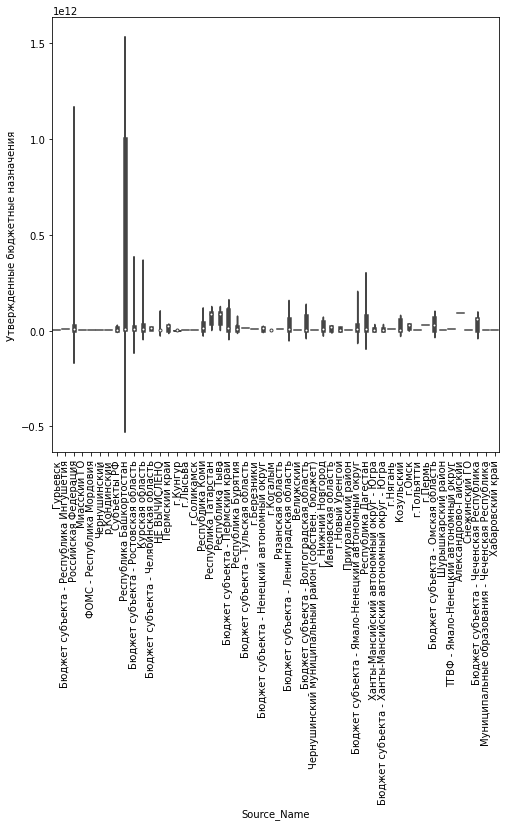

In [ ]:
ax = sns.violinplot(x= 'Source_Name', y=n, data=df_f[df_f[n] > 1000000000])
plt.xticks(rotation='vertical')

Наблюдаемые выбросы не являются ошибками ввода, поскольку наблюдается зависимость, ранее выявленная на диаграмме с доминирующим количеством данных в федеральном регионе (РФ) и в республике Башкортостан.

В целом, по первому общему описанию видно, что данные рассредоточены примерно так же; максимальные значения находятся в рамках допустимого, поэтому удалять их не следует.

**Посмотрим на отрицательные значения и вынесем их в отдельный файл для ознакомления заказчика с данными предположительными ошибками ввода:**

In [ ]:
neg_arr = []
for i in df_f.columns[8:]:
   neg_arr.append(' в столбце '+ i +' отрицательных значений: '+str(len(df_f[df_f[i] < 0])))
neg_arr

[' в столбце Утвержденные бюджетные назначения отрицательных значений: 1429',
 ' в столбце Исполнено отрицательных значений: 1638',
 ' в столбце Неисполненные назначения отрицательных значений: 2805']

In [ ]:
write_to_file("income_negative_values.txt",neg_arr)

'Файл успешно записан'

## Удаление строк с пропусками

created missing indicator for: Source_Catalog_Code
created missing indicator for: Source_Code
created missing indicator for: Source_Name
created missing indicator for: ВБ
created missing indicator for: Адм
created missing indicator for: ИФ
created missing indicator for: ИФ Name
created missing indicator for: Утвержденные бюджетные назначения
created missing indicator for: Исполнено
created missing indicator for: Неисполненные назначения


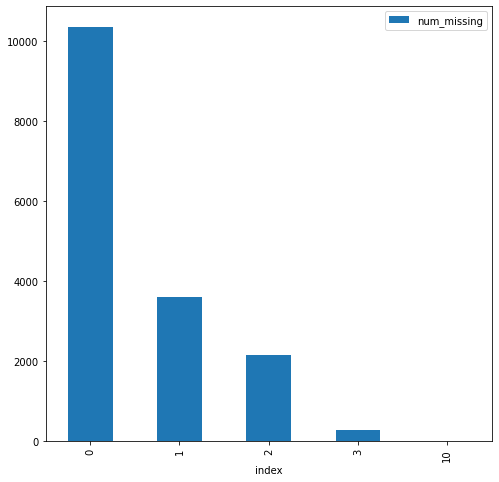

In [ ]:
for col in df_f.columns:
    missing = df_f[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_f['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in df_f.columns if 'ismissing' in col]
df_f['num_missing'] = df_f[ismissing_cols].sum(axis=1)

df_f['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [ ]:
print('Количество строк в датасете до очистки: ', len(df_f))
print('Суммарное количество отсутсвующих значений (Nan) в датасете: ', (len(df_f) - df_f.count()).sum())

Количество строк в датасете до очистки:  16383
Суммарное количество отсутсвующих значений (Nan) в датасете:  8744


In [ ]:
ind_missing = df_f[df_f['num_missing'] == 3].index # если 3 пропуска (предполагается отсутствие данных в главных колонках)
new_df_less_missing_rows = df_f.drop(ind_missing, axis=0,inplace=True)
df_f

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,...,Source_Code_ismissing,Source_Name_ismissing,ВБ_ismissing,Адм_ismissing,ИФ_ismissing,ИФ Name_ismissing,Утвержденные бюджетные назначения_ismissing,Исполнено_ismissing,Неисполненные назначения_ismissing,num_missing
0,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000710,"Бюджетные кредиты, полученные от других бюджет...",14907900.0,13500000.0,...,False,False,False,False,False,False,False,False,False,0
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5800000.0,-5800000.0,...,False,False,False,False,False,False,False,False,False,0
2,2007 год,Гос,000,Российская Федерация,0.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,7.0,109998.0,...,False,False,False,False,False,False,False,False,False,0
3,2007 год,Гос,000,Российская Федерация,3.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,6.0,18.0,...,False,False,False,False,False,False,False,False,False,0
4,2007 год,Гос,000,Российская Федерация,2.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,2.0,6.0,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,01010000000000000,"Государственные (муниципальные) ценные бумаги,...",40.0,5.0,...,False,False,False,False,False,False,False,False,False,0
16379,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000040000820,Погашение бюджетами городских округов бюджетны...,1.0,NaN,...,False,False,False,False,False,False,False,True,False,1
16380,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000030000820,Погашение бюджетами внутригородских муниципаль...,1.0,NaN,...,False,False,False,False,False,False,False,True,False,1
16381,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000110000820,Погашение бюджетами городских округов с внутри...,1.0,NaN,...,False,False,False,False,False,False,False,True,False,1


In [ ]:
print('Количество строк в датасете после очистки: ', len(df_f))
print('Суммарное количество отсутсвующих значений (Nan) в датасете: ', (len(df_f) - df_f.count()).sum())

Количество строк в датасете после очистки:  16111
Суммарное количество отсутсвующих значений (Nan) в датасете:  7928


In [ ]:
del df_f['Source_Code_ismissing']	
del df_f['Source_Name_ismissing']		
del df_f['ВБ_ismissing']		
del df_f['Адм_ismissing']		
del df_f['ИФ_ismissing']		
del df_f['ИФ Name_ismissing']		
del df_f['Утвержденные бюджетные назначения_ismissing']		
del df_f['Исполнено_ismissing']		
del df_f['Неисполненные назначения_ismissing']		
del df_f['num_missing']	
del df_f['Source_Catalog_Code_ismissing']

In [ ]:
df_f

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
0,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000710,"Бюджетные кредиты, полученные от других бюджет...",14907900.0,13500000.0,1407900.0
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5800000.0,-5800000.0,0.0
2,2007 год,Гос,000,Российская Федерация,0.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,7.0,109998.0,-109991.0
3,2007 год,Гос,000,Российская Федерация,3.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,6.0,18.0,-12.0
4,2007 год,Гос,000,Российская Федерация,2.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,2.0,6.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
16378,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,01010000000000000,"Государственные (муниципальные) ценные бумаги,...",40.0,5.0,35.0
16379,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000040000820,Погашение бюджетами городских округов бюджетны...,1.0,NaN,1.0
16380,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000030000820,Погашение бюджетами внутригородских муниципаль...,1.0,NaN,1.0
16381,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000110000820,Погашение бюджетами городских округов с внутри...,1.0,NaN,1.0


По результатам разведочного анализа выяснено, что во входном наборе данных в колонках могут быть значения "НЕ ВЫЧИСЛЕН". В целях понижения размерности задачи такие значения следует удалять в силу неинформативности. Для автоматизации этого процесса создана такая-то функция del_not_counted

In [ ]:
def del_not_counted(df):
  df_1 = df.copy()
  df_1 = df_1[df_1['Source_Catalog_Code'] != 'НЕ ВЫЧИСЛЕН']
  return df_1

In [ ]:
df_f = del_not_counted(df_f)

Стоит помнить, что 'Source_Code' и 'Source_Name' являются разными атрибутами.

In [ ]:
tt = df_f['Source_Code'].unique()
ttt = []
for i in tt:
  ttt+=[x for x in df_f[df_f['Source_Code'] == i].Source_Name.unique()]
if len(tt) == len(ttt):
  print('поля дублируются')
else:
  print('поля не дублируют друг друга')

поля не дублируют друг друга


Окончательная версия датафрейма, готового к экспорту в csv-файл:

In [ ]:
df_f 

,Period_Name,Source_Catalog_Code,Source_Code,Source_Name,ВБ,Адм,ИФ,ИФ Name,Утвержденные бюджетные назначения,Исполнено,Неисполненные назначения
0,2007 год,Гос,000,Российская Федерация,10.0,000,02010100100000710,"Бюджетные кредиты, полученные от других бюджет...",14907900.0,13500000.0,1407900.0
1,2007 год,Гос,000,Российская Федерация,5.0,000,02010200050000810,"Кредиты, полученные в валюте Российской Федера...",-5800000.0,-5800000.0,0.0
2,2007 год,Гос,000,Российская Федерация,0.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,7.0,109998.0,-109991.0
3,2007 год,Гос,000,Российская Федерация,3.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,6.0,18.0,-12.0
4,2007 год,Гос,000,Российская Федерация,2.0,000,01010000010000710,Размещение государственных ценных бумаг Росси...,2.0,6.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
16378,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,01010000000000000,"Государственные (муниципальные) ценные бумаги,...",40.0,5.0,35.0
16379,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000040000820,Погашение бюджетами городских округов бюджетны...,1.0,NaN,1.0
16380,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000030000820,Погашение бюджетами внутригородских муниципаль...,1.0,NaN,1.0
16381,Январь 2020 года,Рег,01,Республика Башкортостан,2.0,048,02050000110000820,Погашение бюджетами городских округов с внутри...,1.0,NaN,1.0


## Выгрузка файла


Экспортировать обработанный датафрейм можно тремя удобными способами (форматами):
- в .csv-формат (экономно по времени);
- в .xlsx-формат (занимает около 1 мин., но удобно сразу приступать к работе над дашбордами);
- в .txt-формат (экономно по времени, полезно для прочих целей).

Кодировка "UTF-8 со спецификацией" была выбрана для устранения проблем со считыванием экспортированного файла на корню.

In [ ]:
df_f.to_excel(path+'out_if.xlsx', encoding="utf-8-sig")

In [ ]:
df_f.to_csv(path+'out_if.txt', encoding="utf-8-sig")

In [ ]:
df_f.to_csv(path+'out_if.csv', encoding="utf-8-sig")

## Заключение

![](https://sun9-74.userapi.com/s/v1/if2/vvX_s2dMG5BDMj16rHs-ZcPLyvMMP2u6dFxNWqwhc3AcjgKpPiFpSbdClACyxJo5HTs6yh5asbUXteu0G1WOuAIO.jpg?size=1369x790&quality=96&type=album)
![](https://sun9-3.userapi.com/s/v1/if2/B06ZlZRU2uoRw8gQgr1aa5GTa48cdBdVRwFeyFN6IYeN1PaGcbFTdiz0VY_H3JprUgsTy_wg4nO4EzAiBT8ZXfL2.jpg?size=518x231&quality=96&type=album)

Результаты: 
- Разработан способ обработки данных (независимый Коннектор);
- «Грязные» данные считываются все или с учётом фильтров;
- «Чистые» данные считываются все или с учётом фильтров;
- «Грязные» данные оцениваются и очищаются (автоматически / с участием пользователя);
- Процесс очистки данных параметризирован.

- Динамический дашбоард разработан и позволяет:
  - Рассматривать данные в различных разрезах (по годам, коду источника каталога, по типу субъекта);
  - С применением связанных фильтров;
  - Графические элементы используются «разумным» образом;
  - Chart-ы позволяют дать экономическую интерпретацию.

Список использованных источников:
 - ***Бизнес-аналитика: от данных к знаниям, учебное пособие*** (Н. Паклин, В.Орешков)
 - Пособие по визуализации "Графики. Что вы хотите показать?"
 - https://www.youtube.com/watch?v=4roVtL2mynA&list=PLsPotgU_ELTr4CErtpe13uGeCFX93Fiwb


